In [22]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input


In [6]:
# Define constants
IMG_SIZE = 64
TRAIN_DATA_PATH = 'data/asl_alphabet_train/asl_alphabet_train'  # Replace with actual path
CLASS_NAMES = list(map(chr, range(65, 91)))  # A-Z letters


In [11]:
def load_data(data_path):
    images = []
    labels = []
    for class_name in CLASS_NAMES:
        class_folder = os.path.join(data_path, class_name)
        print(class_folder)
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
            img = img_to_array(img)
            img = preprocess_input(img)  # Preprocessing required for VGG16
            images.append(img)
            labels.append(class_name)
    return np.array(images), np.array(labels)

In [12]:
# Load the dataset
X, y = load_data(TRAIN_DATA_PATH)

data/asl_alphabet_train/asl_alphabet_train/A
data/asl_alphabet_train/asl_alphabet_train/B
data/asl_alphabet_train/asl_alphabet_train/C
data/asl_alphabet_train/asl_alphabet_train/D
data/asl_alphabet_train/asl_alphabet_train/E
data/asl_alphabet_train/asl_alphabet_train/F
data/asl_alphabet_train/asl_alphabet_train/G
data/asl_alphabet_train/asl_alphabet_train/H
data/asl_alphabet_train/asl_alphabet_train/I
data/asl_alphabet_train/asl_alphabet_train/J
data/asl_alphabet_train/asl_alphabet_train/K
data/asl_alphabet_train/asl_alphabet_train/L
data/asl_alphabet_train/asl_alphabet_train/M
data/asl_alphabet_train/asl_alphabet_train/N
data/asl_alphabet_train/asl_alphabet_train/O
data/asl_alphabet_train/asl_alphabet_train/P
data/asl_alphabet_train/asl_alphabet_train/Q
data/asl_alphabet_train/asl_alphabet_train/R
data/asl_alphabet_train/asl_alphabet_train/S
data/asl_alphabet_train/asl_alphabet_train/T
data/asl_alphabet_train/asl_alphabet_train/U
data/asl_alphabet_train/asl_alphabet_train/V
data/asl_a

In [13]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# Reshape for KNN
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [15]:
# Initialize the KNN Classifier
knn = KNeighborsClassifier()

In [16]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# Predict on the test dataset
y_pred = knn.predict(X_test)

In [18]:
# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Calculate and print empirical error
empirical_error = 1 - accuracy_score(y_test, y_pred)
print(f'Empirical error: {empirical_error}')

Accuracy: 0.9695726495726495
Empirical error: 0.030427350427350452


In [23]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=CLASS_NAMES)

# Create a DataFrame from confusion matrix
df_cm = pd.DataFrame(conf_mat, index=[i for i in CLASS_NAMES], columns=[i for i in CLASS_NAMES])


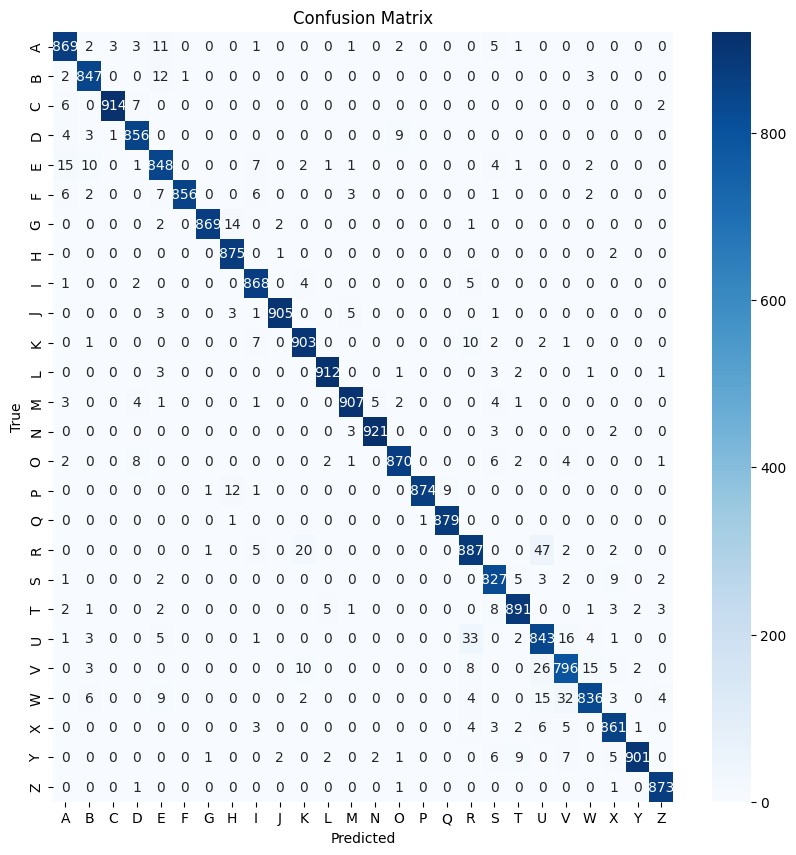

In [24]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()